In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.layers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import shutil
import matplotlib.pyplot as plt

path = r'/content/drive/MyDrive/hackerthon/chicken/'

In [ ]:
trainFileList = os.listdir(path + 'train')
testFileList = os.listdir(path + 'test')

In [7]:
trainFileList = [x for x in trainFileList if 'jpg' in x]
testFileList = [x for x in testFileList if 'jpg' in x]

In [8]:
label_list = list(set(map(lambda x : x[-6:-4], trainFileList)))

In [9]:
# train 폴더 생성 및 파일 이동
currentPath = path + 'train'

try:
    for key in label_list: # 
        os.makedirs(currentPath + f'/{key}')
except:
    pass

for file in trainFileList:
    label = file.split('_')[1].split('.')[0]
    targetPath = currentPath + f'/{label}'
    try :
        shutil.move(currentPath+f'/{file}', targetPath+f'/{file}')
    except:
        pass

In [10]:
# train 폴더 생성 및 파일 이동
currentPath = path + 'test'

try:
    for key in label_list: # 
        os.makedirs(currentPath + f'/{key}')
except:
    pass

for file in testFileList:
    label = file.split('_')[1].split('.')[0]
    targetPath = currentPath + f'/{label}'
    try :
        shutil.move(currentPath+f'/{file}', targetPath+f'/{file}')
    except:
        pass

In [11]:
# train data
trainDataGen = ImageDataGenerator(rescale=1./255,
                                 rotation_range = 10,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 shear_range=0.1,
                                 zoom_range=0.1,
                                 horizontal_flip=False,
                                 vertical_flip=False,
                                 fill_mode='nearest'
                                 )

trainGenSet = trainDataGen.flow_from_directory(
    path + 'train',
    batch_size=64,
    target_size=(28,28),
    class_mode='categorical'
)

In [13]:
# test data
testDataGen = ImageDataGenerator(rescale=1./255)

testGenSet = testDataGen.flow_from_directory(
    path + 'test',
    batch_size=64,
    target_size=(28,28),
    class_mode='categorical'
)

In [15]:
# val data
valDataGen = ImageDataGenerator(rescale=1./255,
                                 rotation_range = 15,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.1,
                                 horizontal_flip=False,
                                 vertical_flip=False,
                                 fill_mode='nearest')

valGenSet = valDataGen.flow_from_directory(
    path + 'train',
    target_size=(28,28),
    batch_size=64,
    class_mode='categorical'
)

Found 50 images belonging to 10 classes.


In [16]:
# 모델 구성

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape=(28,28,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)        

In [18]:
# model compile
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [22]:
# model fit
model.fit(
    trainGenSet,
    steps_per_epoch=3,
    epochs=50,
    validation_data=valGenSet,
    validation_steps=10,
)

Epoch 1/50
3/3 [==============================] - 2s 760ms/step - loss: 0.0737 - accuracy: 0.9667 - val_loss: 0.8055 - val_accuracy: 0.8140
Epoch 2/50
3/3 [==============================] - 2s 734ms/step - loss: 0.0717 - accuracy: 0.9800 - val_loss: 0.7132 - val_accuracy: 0.8020
Epoch 3/50
3/3 [==============================] - 2s 736ms/step - loss: 0.0867 - accuracy: 0.9800 - val_loss: 0.9693 - val_accuracy: 0.7840
Epoch 4/50
3/3 [==============================] - 2s 701ms/step - loss: 0.0743 - accuracy: 0.9800 - val_loss: 0.7098 - val_accuracy: 0.7680
Epoch 5/50
3/3 [==============================] - 2s 692ms/step - loss: 0.0563 - accuracy: 0.9800 - val_loss: 0.9646 - val_accuracy: 0.7960
Epoch 6/50
3/3 [==============================] - 2s 687ms/step - loss: 0.0678 - accuracy: 0.9667 - val_loss: 0.9331 - val_accuracy: 0.7220
Epoch 7/50
3/3 [==============================] - 2s 665ms/step - loss: 0.0894 - accuracy: 0.9533 - val_loss: 0.3441 - val_accuracy: 0.8040
Epoch 8/50
3/3 [====



클로바 나눔손글씨 아줌마 자유


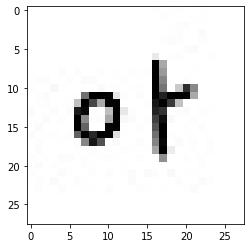



클로바 나눔손글씨 아줌마 자유


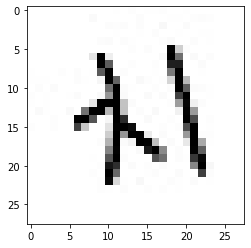



클로바 나눔손글씨 고딕 아니고 고딩


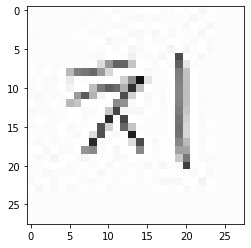



클로바 나눔손글씨 강인한 위로


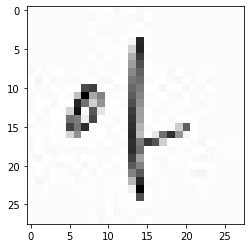



클로바 나눔손글씨 아줌마 자유


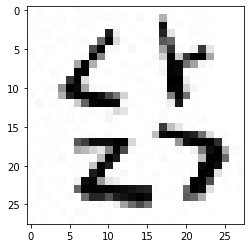



클로바 나눔손글씨 고딕 아니고 고딩


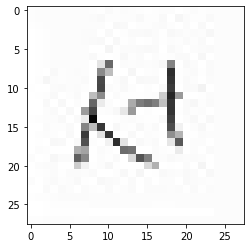



클로바 나눔손글씨 강인한 위로


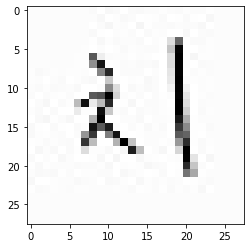



클로바 나눔손글씨 고딕 아니고 고딩


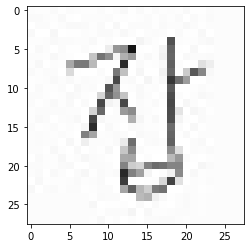



클로바 나눔손글씨 아줌마 자유


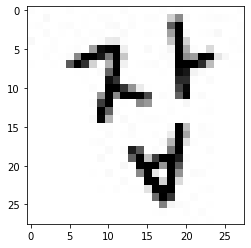



클로바 나눔손글씨 고딕 아니고 고딩


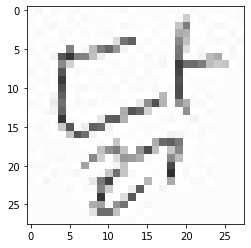



클로바 나눔손글씨 강인한 위로


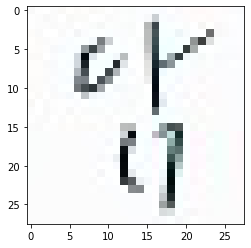



클로바 나눔손글씨 강인한 위로


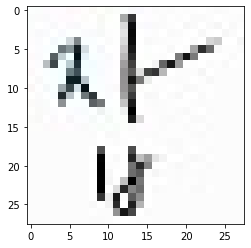



클로바 나눔손글씨 고딕 아니고 고딩


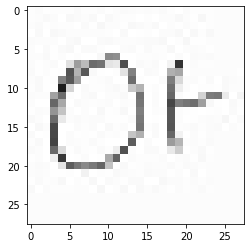



클로바 나눔손글씨 아줌마 자유


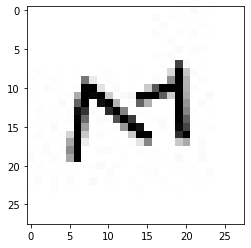



클로바 나눔손글씨 강인한 위로


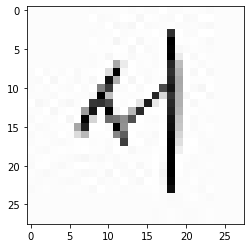

In [24]:
font = {
    '[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]':'클로바 나눔손글씨 아줌마 자유',
    '[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]':'클로바 나눔손글씨 고딕 아니고 고딩',
    '[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]':'클로바 나눔손글씨 강인한 위로'
}

x_test, y_test = testGenSet.next()
for idx in range(len(x_test)) :
    print('\n')
    print(font[f'{y_test[idx]}'])
    plt.imshow(x_test[idx])
    plt.show()